In [1]:
import pandas as pd
import sklearn as st

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error


In [5]:
df=pd.read_csv("chicago_taxi_train.csv")

In [6]:
print(df.head())
print(df.info())

    TRIP_START_TIMESTAMP     TRIP_END_TIMESTAMP  TRIP_START_HOUR  \
0  05/17/2022 7:15:00 AM  05/17/2022 7:45:00 AM             7.25   
1  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
2  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
3  05/17/2022 6:00:00 PM  05/17/2022 7:00:00 PM            18.00   
4  05/17/2022 5:00:00 PM  05/17/2022 5:30:00 PM            17.00   

   TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  PICKUP_CENSUS_TRACT  \
0          2341        2.57         4.0                  NaN   
1          1074        1.18         4.0                  NaN   
2          1173        1.29         4.0         1.703132e+10   
3          3360        3.70         4.0         1.703132e+10   
4          1044        1.15         4.0         1.703132e+10   

   DROPOFF_CENSUS_TRACT  PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA   FARE  \
0                   NaN                    NaN                    17.0  31.99   
1          1.703108e+10                    N

In [7]:
corr=df.corr(numeric_only=True)

In [8]:
fare_corr=(corr['FARE'].sort_values(ascending=False))

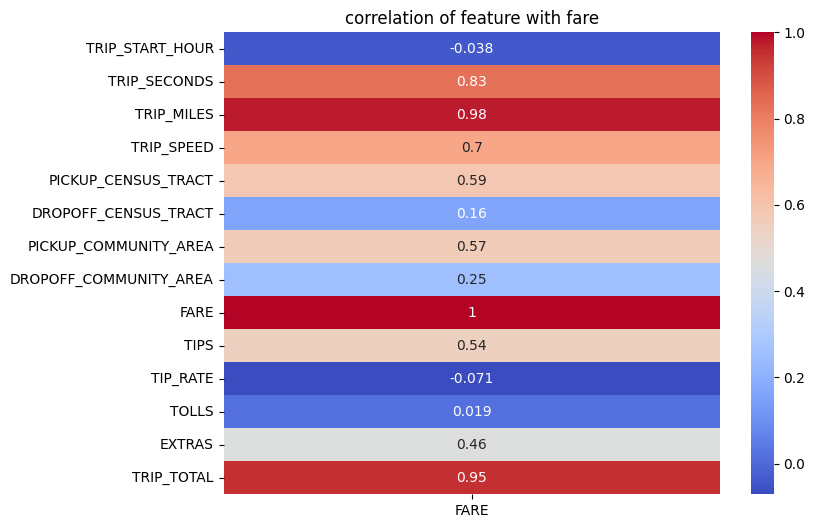

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr[['FARE']],annot=True,cmap='coolwarm')
plt.title("correlation of feature with fare")
plt.show()

In [10]:
features=fare_corr.drop(['FARE','TRIP_TOTAL']).head(3).index.tolist()
print(features)

['TRIP_MILES', 'TRIP_SECONDS', 'TRIP_SPEED']


In [11]:
X=df[features]
Y=df['FARE']

In [12]:
X=X.dropna()
Y=Y.loc[X.index]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
Y_pred=model.predict(X_test)

In [16]:
import numpy as np

In [17]:
r2=r2_score(Y_test,Y_pred)
mea=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))

In [18]:
print("r2\n",r2);
print("mean absolute error\n",mea)
print("rmse\n",rmse)

r2
 0.9562795236851688
mean absolute error
 1.1988633327131701
rmse
 3.59620692902918


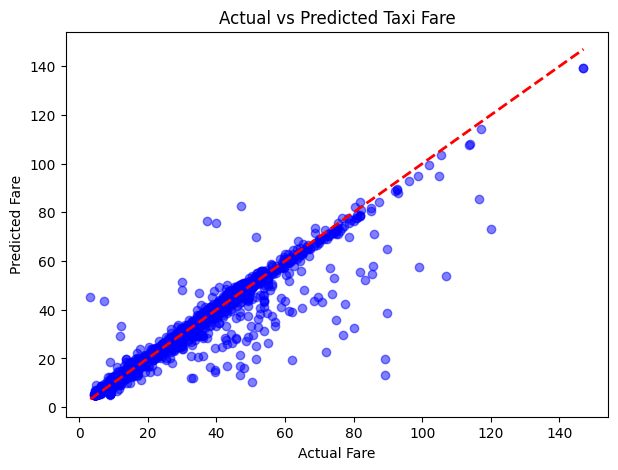

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare")
plt.show()

In [20]:
import pickle

In [21]:
with open("linear_regression_model.pkl","wb") as f:
    pickle.dump(model,f)